In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


Using matplotlib backend: MacOSX


In [29]:
train_df = pd.read_csv('datasets/used_car_train_20200313.csv', sep=' ')
test_df = pd.read_csv('datasets/used_car_testA_20200313.csv', sep=' ')
# train_df = train_df[0:100000]
# test_df = test_df[0:1000]

## EDA


**数据缺失**

- model 149999
- bodyType 145494
- fuelType 141320
- gearbox 144019


In [38]:
train_df.head(10)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
5,5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,...,0.260246,0.000518,0.119838,0.090922,0.048769,1.885526,-2.721943,2.457660,-0.286973,0.206573
6,6,2402,19990411,13.0,4,0.0,0.0,1.0,150,15.0,...,0.267998,0.117675,0.142334,0.025446,0.028174,-4.902200,1.610616,-0.834605,-1.996117,-0.103180
7,7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,...,0.239506,0.000000,0.122943,0.039839,0.082413,3.693829,-0.245014,-2.192810,0.236728,0.195567
8,8,2974,20030205,19.0,1,2.0,1.0,1.0,179,15.0,...,0.263833,0.116583,0.144255,0.039851,0.024388,-4.925234,1.587796,0.075348,-1.551098,0.069433
9,9,82021,19980101,7.0,7,5.0,0.0,0.0,88,15.0,...,0.262473,0.068267,0.012176,0.010291,0.098727,-1.089584,0.600683,-4.186210,0.198273,-1.025822


In [10]:
train_df.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [21]:
train_df.corr(method='pearson').sort_values(by='price')['price']

v_3          -0.730946
kilometer    -0.440519
v_11         -0.275320
v_10         -0.246175
v_9          -0.206205
v_4          -0.147085
v_7          -0.053024
brand        -0.043799
v_13         -0.013993
seller       -0.002004
SaleID       -0.001043
name          0.002030
creatDate     0.002955
regionCode    0.014036
v_14          0.035911
v_1           0.060914
v_6           0.068970
v_2           0.085322
model         0.136983
v_5           0.164317
fuelType      0.200536
power         0.219834
bodyType      0.241303
gearbox       0.329075
regDate       0.611959
v_0           0.628397
v_8           0.685798
v_12          0.692823
price         1.000000
offerType          NaN
Name: price, dtype: float64

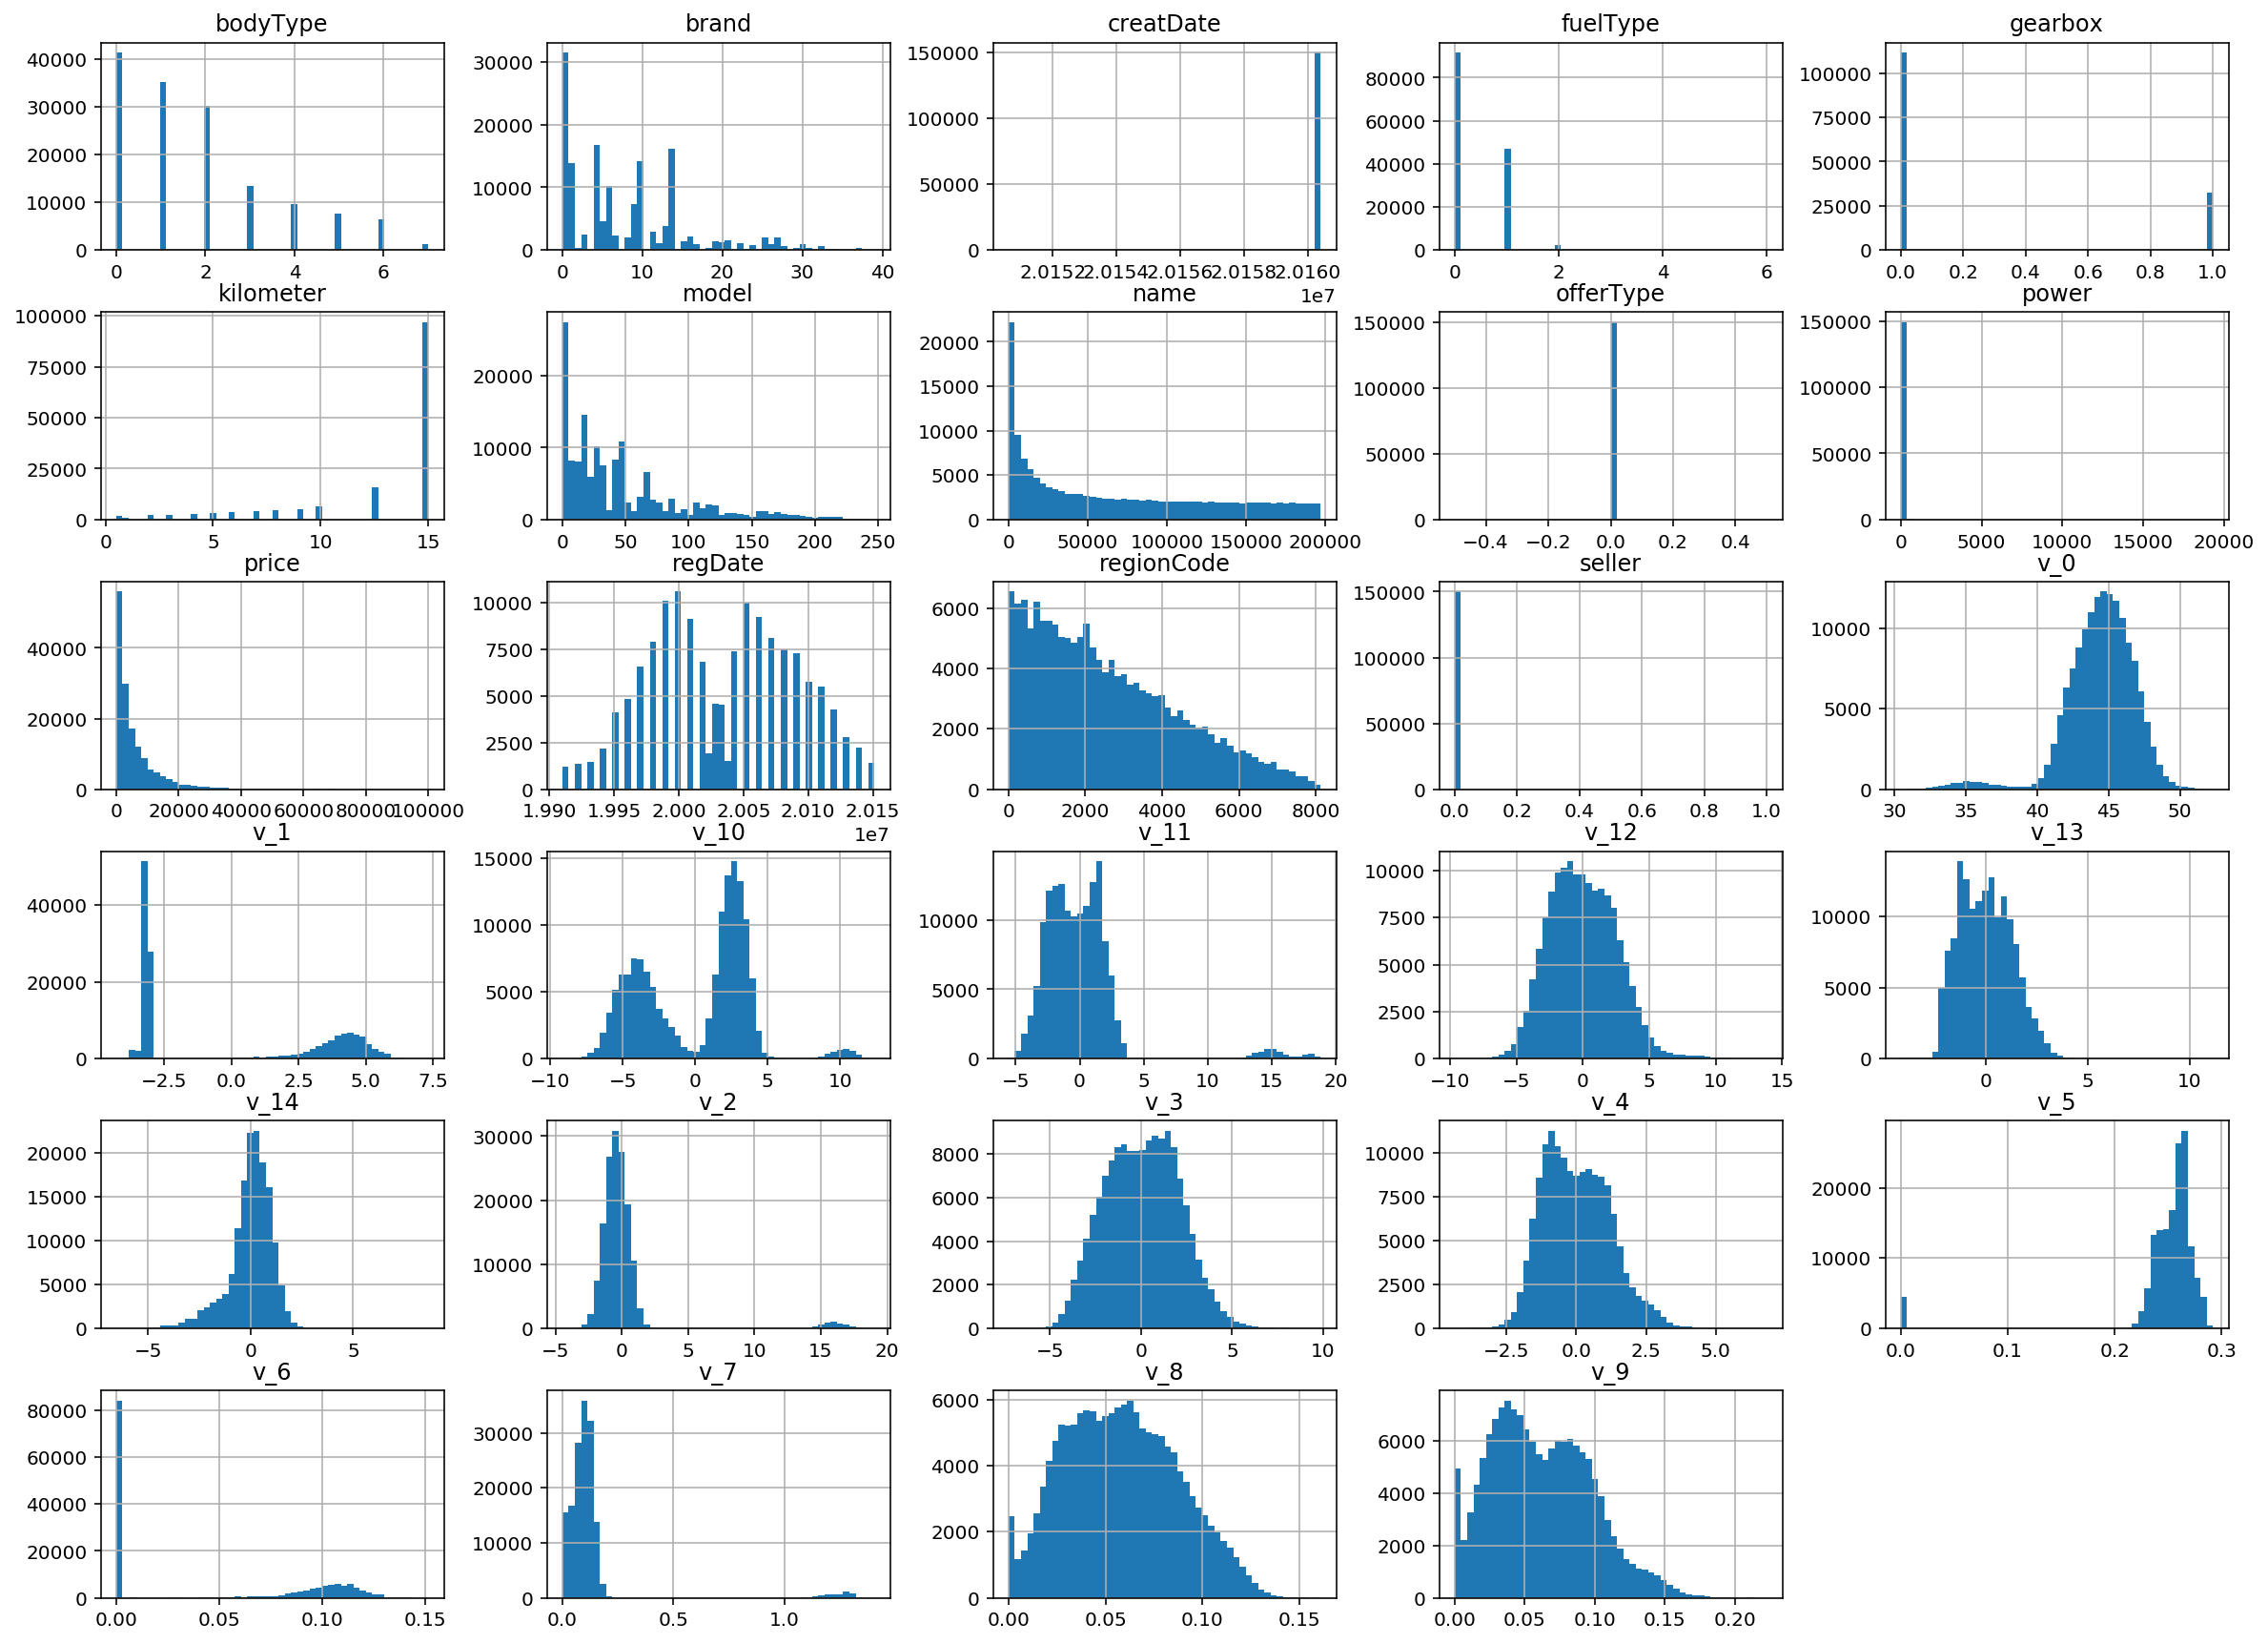

In [26]:
show_df = train_df[[item for item in train_df.columns if item not in ('SaleID', '')]]
show_df.hist(bins=50, figsize=(20,15))
plt.show()

## 特征工程

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    """
    sklearn库主要使用numpy数组, 所以将dataframe全部转化为numpy数组.
    自定义转化器需添加基类：BaseEstimator, TransformerMixin
    """
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        """返回numpy数组"""
        return x[self.attribute_names].values
    
def get_columns_index(df, columns):
    return [list(df.columns).index(column) for column in list(columns)]

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# 数值类型处理
# notRepairedDamage
# num_attribute_names = ['model', 'brand','bodyType','fuelType','gearbox', 'power', 'kilometer',
#                       'regionCode', 'seller', 'offerType', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
#                       'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_4']

# |皮尔逊系数|>0.2
num_attribute_names = ['v_3', 'kilometer', 'v_11', 'v_10', 'v_9', 'v_12', 'v_8', 'v_0', 'regDate', 'gearbox', 'bodyType', 'power', 'fuelType']

num_pipline = Pipeline([
    ('selector', DataFrameSelector(num_attribute_names)),
    ('imputer', SimpleImputer(strategy='median')),
#     ('std_scaler', StandardScaler())
])

# 文本类型处理
# text_attribute_names = ['Sex','Ticket','Embarked']
# text_pipline = Pipeline([
#     ('selector', DataFrameSelector(text_attribute_names)),
#     ('imputer', SimpleImputer(strategy='most_frequent')),    
#     ('text_encoder', OneHotEncoder(sparse=False)
# ])

# 合并
union_pipplines = FeatureUnion(transformer_list=[
    ('num_pipline', num_pipline),
#     ('text_pipline', text_pipline),
])

# 数据预处理
# TODO: OneHot编码，test数据集里的枚举值合并到测试集里，不然会报错。找到其他解决方案
# union_pipplines.fit_transform(train_df.append(test_df))
# train_df_prepares = union_pipplines.transform(train_df)
# test_df_prepares = union_pipplines.transform(test_df)

union_pipplines.fit_transform(train_df)
train_df_prepares = union_pipplines.transform(train_df)

## 构建模型

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

estimator = LinearRegression()
# estimator = GridSearchCV(estimator, param_grid={}, cv=5)
estimator.fit(train_df_prepares, train_df['price'])
train_df_predict = estimator.predict(train_df_prepares)

mae = mean_absolute_error(train_df['price'], train_df_predict)
print('MAE {}'.format(mae))

# # 最佳参数
# print(u'最佳参数: \n', estimator.best_params_)
# # 最佳结果
# print(u'结果: \n', estimator.best_score_)
# # 最佳估计器
# print(u'估计器: \n', estimator.best_estimator_)
# # 交叉验证结果
# print(u'交叉验证结果: \n', estimator.cv_results_)


# 输出预测结果
# test_df_predict = estimator.predict(test_df_prepares)

MAE 2687.728956071313


In [12]:
train_df['price']

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [13]:
train_df_predict

array([ 1228.25166106,  4366.87342107, 10263.25076175, ...,
       10921.33984041,  6741.67643678,  8116.84212291])